In [3]:
using CSV, DataFrames 
using DelimitedFiles
using Plots
using Plots.Measures
using Printf
using LaTeXStrings


In [6]:
N = 100000
q = 3
alpha = 0.1
c0_ = [ 1.] 
labels_c0 = ["c0 = 0", "c0 = 1"]
colors_c0 = [:blue, :red]
shapes_c0 = [:circle, :diamond]
yearvariant = "2025"
h = [0.0, 0.05]
# plotname = "EPO_$yearvariant _N$(N)_q$(q)_alpha$(@sprintf("%.2f", alpha))_with_MFA.png"
plotname = "EPO_$yearvariant _N$(N)_q$(q)_alpha$(@sprintf("%.2f", alpha))_he$(@sprintf("%.2f", h[1]))_hp$(@sprintf("%.2f", h[2]))_with_MFA.png"
# h = [[0, 0], [0.01, 0], [0.05, 0]]
# h = [[0, 0], [0.01, 0], [0.05, 0], [0, 0.01], [0, 0.05]]



"EPO_2025 _N100000_q3_alpha0.10_he0.00_hp0.05_with_MFA.png"

circle
1413


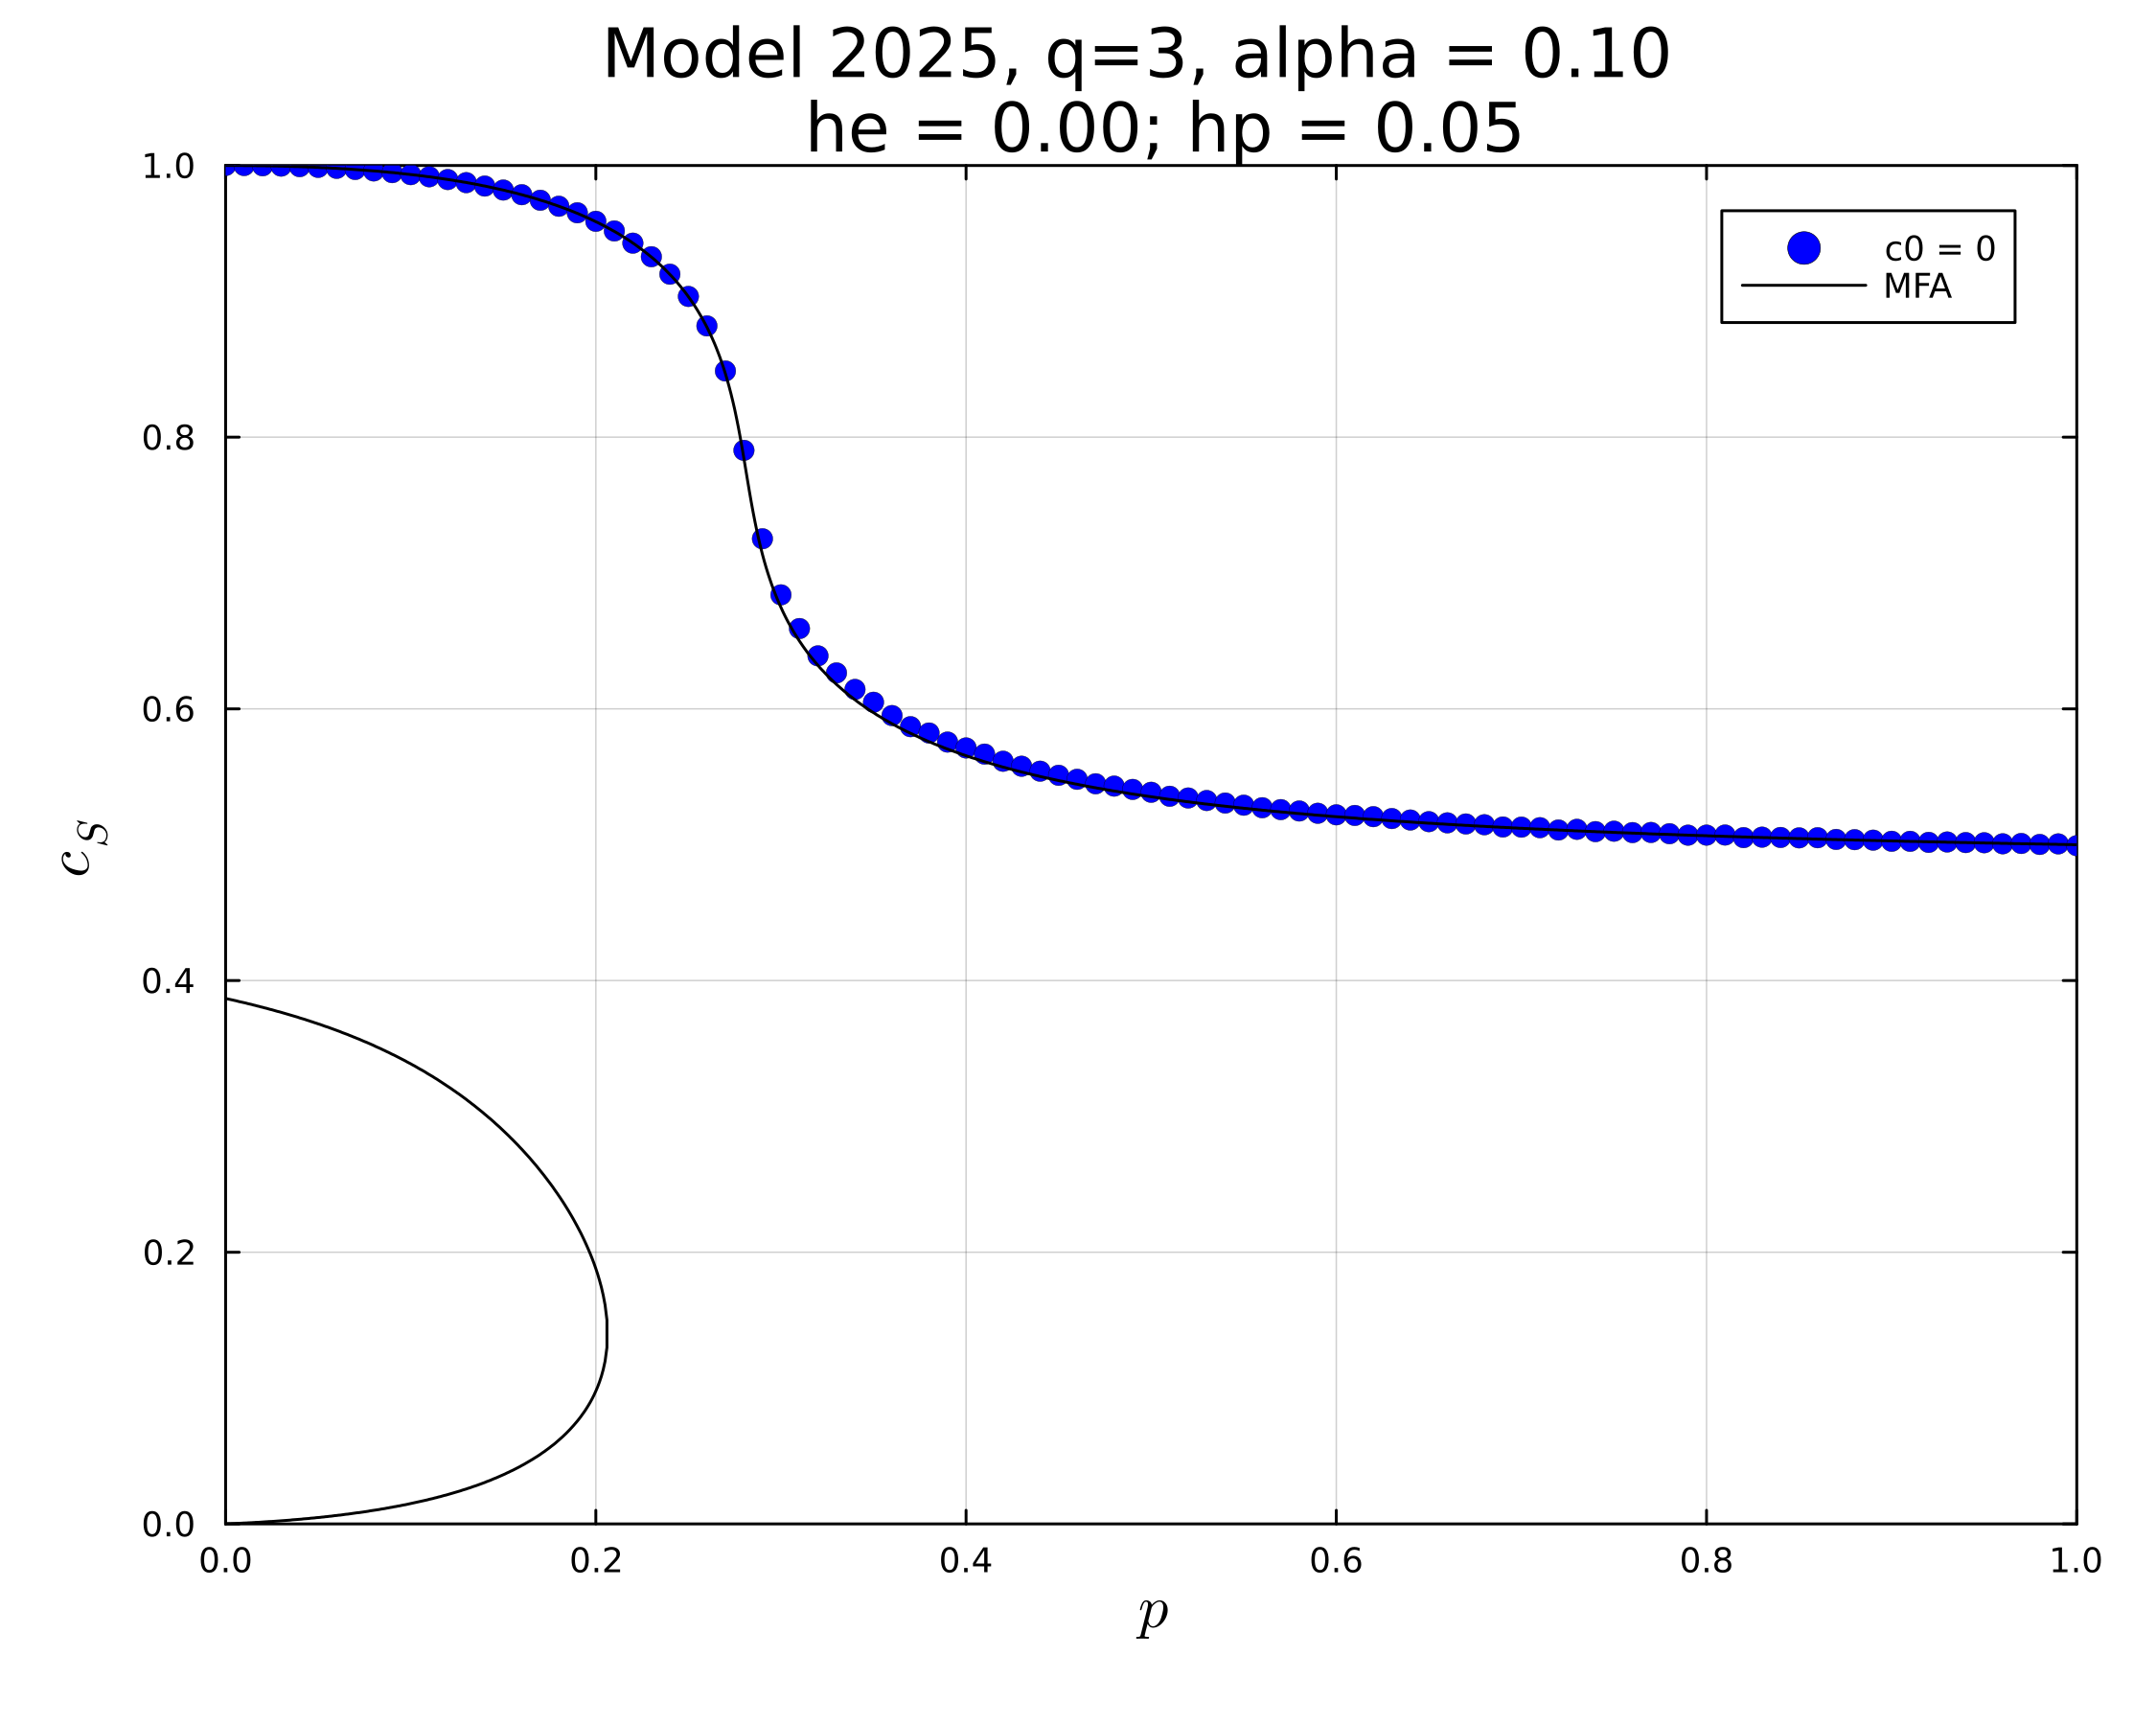

In [7]:
p1 = plot(xlabel="\$p\$", ylabel="\$c_S\$", xlims=(0, 1), ylims=(0, 1), margin=5mm)

he, hp = h


for (id, c0) in enumerate(c0_)
    filename = "EPO_$(yearvariant)_N$(N)_q$(q)_alpha$(@sprintf("%.2f", alpha))_c0$(@sprintf("%.2f", c0))_he$(@sprintf("%.2f", he))_hp$(@sprintf("%.2f", hp)).txt"

    #df = CSV.read(joinpath("qv_EPO", filename), DataFrame; delim='\t')  
    df = readdlm(joinpath("qv_EPO_$yearvariant", filename), '\t')  # For CSV-style files
    # print(df)

    p = df[:, 1]
    cE = df[:, 2]
    cP = df[:, 3]
    diss = df[:, 4]

    msize = 4
    plot!(p1, p, cE, seriestype=:scatter, markersize = msize, markershape = shapes_c0[id], mcolor = colors_c0[id], msw = 0.1, framestyle=:box, xlabelfontsize=14, ylabelfontsize=14,
    label = labels_c0[id])
    println(shapes_c0[id])

end

pathanalytics = "C:/Users/Basia/OneDrive - Politechnika Wroclawska/Pulpit/PhD/Current work/ExternalInfluence/MFA"
# pathanalytics = "qv_EPO_$yearvariant"
filenameanalytics = "EPO_$(yearvariant)_q$(q)_alpha_$(@sprintf("%.2f", alpha))_h_e_$(@sprintf("%.2f", he))_h_p_$(@sprintf("%.2f", hp))_cS.txt"
# filenameanalytics = "EPO_$(yearvariant)_q$(q)_alpha_$(@sprintf("%.2f", alpha))_h_e_$(@sprintf("%.2f", he))_h_p_$(@sprintf("%.2f", hp))_cS.txt"

dfanalytics = readdlm(joinpath(pathanalytics, filenameanalytics), '\t')
dfan = DataFrame(p=dfanalytics[:, 1], cE = dfanalytics[:, 2]) # , 'cP' => dfanalytics[:, 3], 'diss' => dfanalytics[:, 4])
println(length(dfan[:, 1]))

# df_ranked = combine(groupby(dfan, :p)) do subdf
#     sort!(subdf, :cE, rev=true)
#     subdf.rank = 1:nrow(subdf)
#     subdf
# end

# df_reordered = sort(df_ranked, [:rank, :p])
# select!(df_reordered, Not(:rank))

# dfan = df_reordered

sort!(dfan, [:cE], rev=true)

panalytics = dfanalytics[:, 1]
cEanalytics = dfanalytics[:, 2]
# cPanalytics = dfanalytics[:, 3]
# dissanalytics = dfanalytics[:, 4]


# plot!(p2, p, cP, seriestype=:scatter, markersize = msize, framestyle=:box, xlabelfontsize=14, ylabelfontsize=14, label = false)
# plot!(p3, p, diss, seriestype=:scatter, markersize = msize, framestyle=:box, xlabelfontsize=14, ylabelfontsize=14, label = false)
startidx1, startidx2, startidx3 = Vector(findall(x -> x == 0, dfan[:, 1]))
plot!(p1, dfan[startidx1:startidx2-1, 1], dfan[startidx1:startidx2-1, 2], lcolor = :black, markersize=0.5, msw = 0, xlabelfontsize=14, ylabelfontsize=14,
    alpha=1, label = "MFA")

# plot!(p1, dfan[startidx2:startidx3-1, 1], dfan[startidx2:startidx3-1, 2], lcolor = :black, markersize=0.5, msw = 0, xlabelfontsize=14, ylabelfontsize=14,
#     alpha=1, label = "")

plot!(p1, dfan[startidx2:length(dfan[:, 1]), 1], dfan[startidx2:length(dfan[:, 1]), 2], 
    lcolor = :black, markersize=0.5, msw = 0, xlabelfontsize=14, ylabelfontsize=14,
    alpha=1, label = "")

# testidx1, testidx2 = [2000, 3_000]
# plot!(p1, dfan[testidx1:testidx2, 1], dfan[testidx1:testidx2, 2], lcolor = :black, markersize=0.5, msw = 0, 
#     xlabelfontsize=14, ylabelfontsize=14,
#     alpha=1, label = "")


plot!()
# label = "he = $(@sprintf("%.2f", he)); hp = $(@sprintf("%.2f", hp))")
# println(dfan[startidx2:startidx3-1, 1])
# println(dfan[startidx2:startidx3-1, 2])
# println(npointsanust * 2 + npointsan)
# println(length(panalytics))
# println(dfan[npointsan + 1: npointsanust + npointsan , 1])


plotname = "EPO_$(yearvariant)_N$(N)_q$(q)_alpha$(@sprintf("%.2f", alpha))_he$(@sprintf("%.2f", h[1]))_hp$(@sprintf("%.2f", h[2]))_with_MFA.png"
# vline!([0.3], linestyle=:dash, linecolor=:black, label="")
# vline!([maximum(dfan[startidx2:length(dfan[:, 1]), 1])], linestyle=:dash, linecolor=:black, label="")

# final_plot = plot(p1, size=(1000, 800), plot_title="Model $yearvariant, q=$q, alpha = $(@sprintf("%.2f", alpha))", dpi=300)
final_plot = plot(p1, size=(750, 600), plot_title="Model $yearvariant, q=$q, alpha = $(@sprintf("%.2f", alpha)) \n he = $(@sprintf("%.2f", h[1])); hp = $(@sprintf("%.2f", h[2]))", dpi=300)

display(final_plot)
# plot!(final_plot, legend=:topright, legendfontsize=10)
# display(final_plot)

# savefig(joinpath("qv_EPO_figures_$(yearvariant)/", plotname))


In [218]:
maximum(dfan[startidx2:length(dfan[:, 1]), 1])

0.246

In [219]:
maximum(dfan[startidx1:startidx2-1, 1])

1.0

In [220]:
findall(x -> x == 0.2448, dfan[startidx1:startidx2-1, 1])

Int64[]

In [221]:
findall(x -> x == 0.3, dfan[startidx1:startidx2-1, 1])

1-element Vector{Int64}:
 322

In [222]:
maximum(dfan[2448:3400, 1])

BoundsError: BoundsError: attempt to access 1516×2 DataFrame at index [2448:3400, 1]

In [223]:
minimum(dfan[2448:3400, 1])

BoundsError: BoundsError: attempt to access 1516×2 DataFrame at index [2448:3400, 1]